In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [5]:
file_path = r"C:\Users\20220374\Documents\IA\Bank marketing\train.csv"
# Import du jeu de données
df = pd.read_csv(file_path)
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [14]:
le = LabelEncoder()
X['job'] = le.fit_transform(X['job'])
X['marital'] = le.fit_transform(X['marital'])
X['education'] = le.fit_transform(X['education'])
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])
X['poutcome'] = le.fit_transform(X['poutcome'])

y = le.fit_transform(y)

In [16]:
sc = StandardScaler()
X = sc.fit_transform(X)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 3 neurones
        self.model.add(tf.keras.layers.Dense(10, input_dim=input_dim, activation='relu'))

        # Deuxième couche cachée de 3 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

        # Troisième couche cachée de 6 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

        # Couche de sortie du model
        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

    
model = MultiLayerPerceptron(12, 1).model


model.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                130       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
322/322 [==============================] - 3s 5ms/step - loss: 0.6106 - accuracy: 0.6861 - val_loss: 0.5630 - val_accuracy: 0.7292
Epoch 2/10
322/322 [==============================] - 1s 4ms/step - loss: 0.5671 - accuracy: 0.7200 - val_loss: 0.5502 - val_accuracy: 0.7327
Epoch 3/10
322/322 [==============================] - 1s 4ms/step - loss: 0.5568 - accuracy: 0.7330 - val_loss: 0.5433 - val_accuracy: 0.7385
Epoch 4/10
322/322 [==============================] - 1s 4ms/step - loss: 0.5495 - accuracy: 0.7369 - val_loss: 0.5409 - val_accuracy: 0.7424
Epoch 5/10
322/322 [==============================] - 1s 4ms/step - loss: 0.5456 - accuracy: 0.7418 - val_loss: 0.5385 - val_accuracy: 0.7483
Epoch 6/10
322/322 [==============================] - 1s 4ms/step - loss: 0.5428 - accuracy: 0.7440 - val_loss: 0.5356 - val_accuracy: 0.7510
Epoch 7/10
322/322 [==============================] - 1s 4ms/step - loss: 0.5405 - accuracy: 0.7459 - val_loss: 0.5329 - val_accuracy: 0.7529
Epoch 

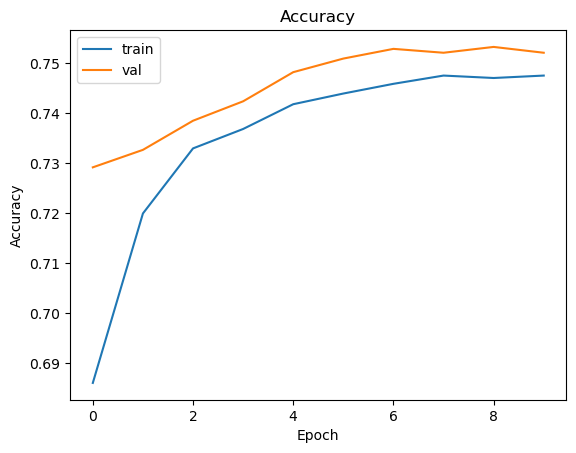

In [24]:
plot_history(history)

In [28]:
from sklearn.metrics import accuracy_score

# Obtenir les prédictions sur les données de test
y_pred = model.predict(X_test)



81/81 [==============================] - 0s 2ms/step


In [32]:
# Convertir les prédictions en 0 ou 1 avec un seuil de 0.5
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Calculer l'accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy du modèle : {:.2f}%".format(accuracy*100))


Accuracy du modèle : 75.21%


In [34]:
# Affichage des poids du modèle
weights = model.get_weights()
print(weights)

[array([[-1.80243492e-01,  7.47650266e-02,  6.14994287e-01,
        -6.63615823e-01,  1.24248147e-01,  1.96060836e-01,
        -3.19402039e-01, -9.96534750e-02, -7.40561664e-01,
        -4.45596501e-02],
       [-1.24933027e-01, -1.78710699e-01, -2.08151743e-01,
         1.71867877e-01,  1.33189097e-01, -5.46000004e-01,
         1.16757900e-02, -2.59285033e-01,  1.13285773e-01,
        -3.01637024e-01],
       [ 2.82819897e-01, -7.45982006e-02, -5.68122156e-02,
         3.05422932e-01,  2.77005732e-02, -5.95267862e-02,
        -2.68771052e-01,  2.65269220e-01, -5.92995957e-02,
        -4.62431051e-02],
       [-4.61254358e-01,  3.53420615e-01,  2.91548520e-01,
        -1.23417012e-01,  1.92422226e-01, -1.82016730e-01,
         4.29537773e-01, -4.59226698e-01,  4.10924584e-01,
        -1.79301485e-01],
       [-7.07734451e-02,  2.86279470e-01, -1.49608314e-01,
        -2.84028023e-01, -4.46276754e-01,  5.63666940e-01,
         3.50707285e-02, -1.23276837e-01,  9.81184170e-02,
        -2

In [35]:
weights = model.get_weights()
for i in range(len(weights)):
    print(f"Poids de la couche {i}: {weights[i]}")

Poids de la couche 0: [[-1.80243492e-01  7.47650266e-02  6.14994287e-01 -6.63615823e-01
   1.24248147e-01  1.96060836e-01 -3.19402039e-01 -9.96534750e-02
  -7.40561664e-01 -4.45596501e-02]
 [-1.24933027e-01 -1.78710699e-01 -2.08151743e-01  1.71867877e-01
   1.33189097e-01 -5.46000004e-01  1.16757900e-02 -2.59285033e-01
   1.13285773e-01 -3.01637024e-01]
 [ 2.82819897e-01 -7.45982006e-02 -5.68122156e-02  3.05422932e-01
   2.77005732e-02 -5.95267862e-02 -2.68771052e-01  2.65269220e-01
  -5.92995957e-02 -4.62431051e-02]
 [-4.61254358e-01  3.53420615e-01  2.91548520e-01 -1.23417012e-01
   1.92422226e-01 -1.82016730e-01  4.29537773e-01 -4.59226698e-01
   4.10924584e-01 -1.79301485e-01]
 [-7.07734451e-02  2.86279470e-01 -1.49608314e-01 -2.84028023e-01
  -4.46276754e-01  5.63666940e-01  3.50707285e-02 -1.23276837e-01
   9.81184170e-02 -2.69109040e-01]
 [-6.52355731e-01  2.29010046e-01 -1.77475512e-02 -6.51605055e-02
  -6.52644038e-01 -1.20320469e-01  1.47466660e-01 -4.61123214e-04
   4.040179

In [36]:
from tensorflow.keras.layers import Dense

# configuration 1
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)
y_pred = model.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy de la configuration 1 :", accuracy)

Epoch 1/10
322/322 [==============================] - 2s 3ms/step - loss: 0.6227 - accuracy: 0.6650 - val_loss: 0.5686 - val_accuracy: 0.7304
Epoch 2/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5691 - accuracy: 0.7252 - val_loss: 0.5549 - val_accuracy: 0.7389
Epoch 3/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5579 - accuracy: 0.7318 - val_loss: 0.5482 - val_accuracy: 0.7451
Epoch 4/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5517 - accuracy: 0.7347 - val_loss: 0.5422 - val_accuracy: 0.7424
Epoch 5/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5477 - accuracy: 0.7379 - val_loss: 0.5387 - val_accuracy: 0.7463
Epoch 6/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5445 - accuracy: 0.7411 - val_loss: 0.5351 - val_accuracy: 0.7475
Epoch 7/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5426 - accuracy: 0.7412 - val_loss: 0.5348 - val_accuracy: 0.7486
Epoch 

In [37]:
# configuration 2
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=1)
y_pred = model.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy de la configuration 2 :", accuracy)

Epoch 1/20
161/161 [==============================] - 2s 5ms/step - loss: 0.5947 - accuracy: 0.6968 - val_loss: 0.5545 - val_accuracy: 0.7471
Epoch 2/20
161/161 [==============================] - 1s 3ms/step - loss: 0.5566 - accuracy: 0.7334 - val_loss: 0.5428 - val_accuracy: 0.7486
Epoch 3/20
161/161 [==============================] - 1s 3ms/step - loss: 0.5478 - accuracy: 0.7394 - val_loss: 0.5370 - val_accuracy: 0.7529
Epoch 4/20
161/161 [==============================] - 1s 3ms/step - loss: 0.5429 - accuracy: 0.7440 - val_loss: 0.5327 - val_accuracy: 0.7521
Epoch 5/20
161/161 [==============================] - 1s 3ms/step - loss: 0.5399 - accuracy: 0.7453 - val_loss: 0.5337 - val_accuracy: 0.7514
Epoch 6/20
161/161 [==============================] - 1s 4ms/step - loss: 0.5369 - accuracy: 0.7484 - val_loss: 0.5290 - val_accuracy: 0.7580
Epoch 7/20
161/161 [==============================] - 1s 4ms/step - loss: 0.5352 - accuracy: 0.7500 - val_loss: 0.5250 - val_accuracy: 0.7618
Epoch 

In [38]:
# configuration 3
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128, verbose=1)
y_pred = model.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy de la configuration 3 :", accuracy)

Epoch 1/50
81/81 [==============================] - 2s 7ms/step - loss: 0.5999 - accuracy: 0.6984 - val_loss: 0.5494 - val_accuracy: 0.7471
Epoch 2/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5543 - accuracy: 0.7385 - val_loss: 0.5431 - val_accuracy: 0.7498
Epoch 3/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5435 - accuracy: 0.7457 - val_loss: 0.5311 - val_accuracy: 0.7556
Epoch 4/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5380 - accuracy: 0.7487 - val_loss: 0.5274 - val_accuracy: 0.7572
Epoch 5/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.7509 - val_loss: 0.5267 - val_accuracy: 0.7599
Epoch 6/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5322 - accuracy: 0.7522 - val_loss: 0.5233 - val_accuracy: 0.7622
Epoch 7/50
81/81 [==============================] - 0s 4ms/step - loss: 0.5321 - accuracy: 0.7536 - val_loss: 0.5236 - val_accuracy: 0.7677
Epoch 8/50
81/81 [==

In [39]:
# Sauvegarde du modèle
model.save('my_model.h5')
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x0000026848D0BBB0>>

In [40]:
# Chargement du modèle
from tensorflow.keras.models import load_model
loaded_model = load_model('my_model.h5')
loaded_model